<a href="https://colab.research.google.com/github/Eslam-elnahas/Data_Sets-Project/blob/main/Final_Model_EgyptDataset_D_L_24_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coding of Data preparation **

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 66.6 MB/s eta 0:00:00


In [3]:

import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:

!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset'


total 49K
-rw------- 1 root root  630 Mar 21 14:21  classes.json
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 1'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 10'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 11'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 12'
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 2'
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 3'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 4'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 5'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 6'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 7'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 8'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 9'


In [6]:

dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

In [7]:
dataset_name = "EgyptDataset"

In [8]:

for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 9/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 10/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Tile 11/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset/Til

In [9]:
image_patch_size = 256

In [10]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.tif',1)

In [11]:
image.shape

(2228, 2228, 3)

In [12]:
!pip install patchify
from patchify import patchify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 170.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [13]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [14]:
len(image_patches)

8

In [15]:
print(image_patches.shape)

(8, 8, 1, 256, 256, 3)


In [16]:
minmaxscaler = MinMaxScaler()

In [17]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)


In [18]:
image_y[0].shape

(256, 256, 3)

In [19]:
print(type(image))

<class 'numpy.ndarray'>


In [20]:
type(Image.fromarray(image))

PIL.Image.Image

In [21]:
image.shape

(2228, 2228, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

2048

In [23]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'tif'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,12):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [24]:
print(len(image_dataset))
print(len(mask_dataset))

6336
6336


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [26]:
print(len(image_dataset))
print(len(mask_dataset))

6336
6336


In [27]:
type(image_dataset[0])

numpy.ndarray

In [28]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

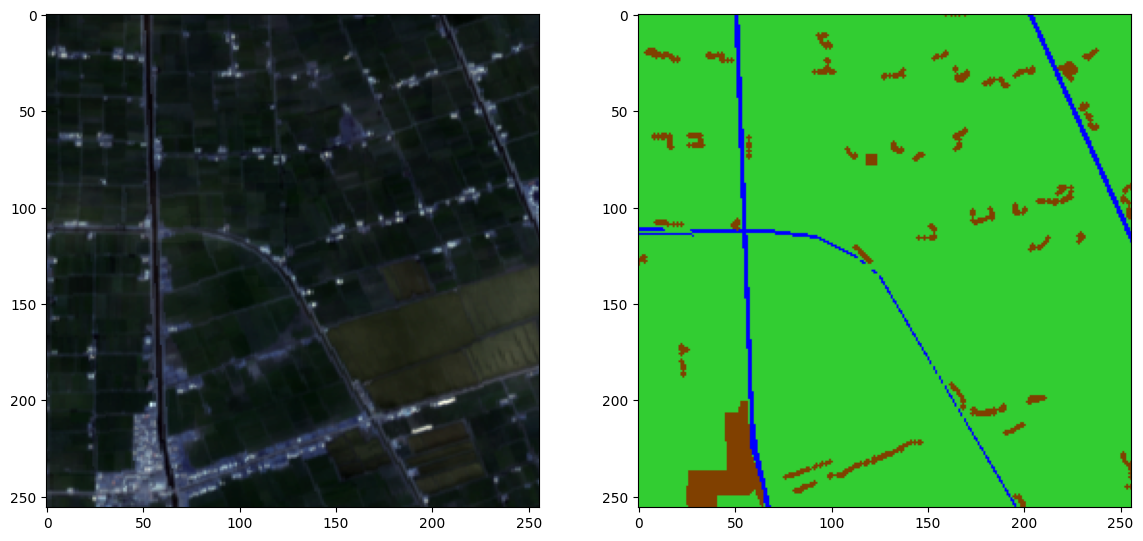

In [29]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [30]:
# class_Agricultural_area = '#32CD32'
class_Agricultural_area = '#32cd32'
class_Agricultural_area = class_Agricultural_area.lstrip('#')
class_Agricultural_area = np.array(tuple(int(class_Agricultural_area[i:i+2], 16) for i in (0,2,4)))
print(class_Agricultural_area)

# class_Built_area= '#804000'
class_Built_area= '#804000'
class_Built_area= class_Built_area.lstrip('#')
class_Built_area= np.array(tuple(int(class_Built_area[i:i+2], 16) for i in (0,2,4)))
print(class_Built_area)

# class_Water_Bodies = '#0000FF'
class_Water_Bodies = '#0000ff'
class_Water_Bodies = class_Water_Bodies.lstrip('#')
class_Water_Bodies = np.array(tuple(int(class_Water_Bodies[i:i+2], 16) for i in (0,2,4)))
print(class_Water_Bodies)

# class_Road = '#9B9B9B'
class_Road = '#9b9b9b'
class_Road = class_Road.lstrip('#')
class_Road = np.array(tuple(int(class_Road[i:i+2], 16) for i in (0,2,4)))
print(class_Road)

# class_Bare_ground = '#8429F6'
class_Bare_ground = '#8429f6'
class_Bare_ground = class_Bare_ground.lstrip('#')
class_Bare_ground = np.array(tuple(int(class_Bare_ground[i:i+2], 16) for i in (0,2,4)))
print(class_Bare_ground)

# class_Unlabeled = '#808080'
class_Unlabeled = '#808080'
class_Unlabeled = class_Unlabeled.lstrip('#')
class_Unlabeled = np.array(tuple(int(class_Unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_Unlabeled)

[ 50 205  50]
[128  64   0]
[  0   0 255]
[155 155 155]
[132  41 246]
[128 128 128]


In [31]:
mask_dataset.shape[0]

6336

In [32]:

label = individual_patched_mask

In [33]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_Bare_ground, axis=-1)] = 0
  label_segment[np.all(label == class_Water_Bodies, axis=-1)] = 1
  label_segment[np.all(label == class_Road, axis=-1)] = 2
  label_segment[np.all(label ==class_Agricultural_area , axis=-1)] = 3
  label_segment[np.all(label == class_Built_area, axis=-1)] = 4
  label_segment[np.all(label == class_Unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [34]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [35]:
print(len(labels))

6336


In [36]:
labels = np.array(labels)

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3]], dtype=uint8)
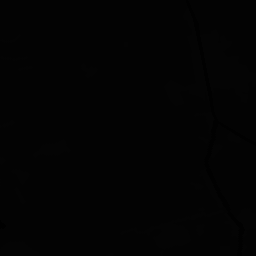

In [37]:



labels[3]

In [38]:
labels = np.expand_dims(labels, axis=3)

In [39]:
labels[0]

array([[[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       ...,

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


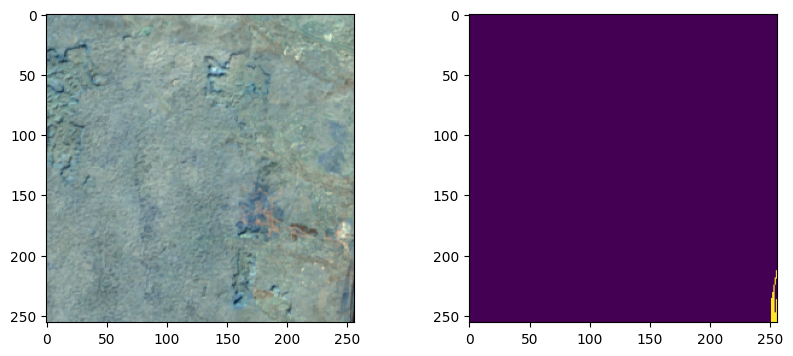

In [42]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)
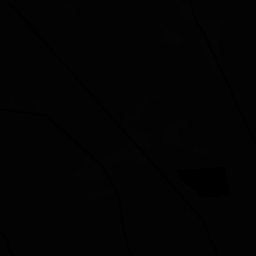

In [43]:
labels[0][:,:,0]

In [44]:
total_classes = len(np.unique(labels))

In [45]:
total_classes

6

In [46]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 154.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 168.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.5 MB/s eta 0:00:00


In [47]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [48]:
labels_categorical_dataset.shape

(6336, 256, 256, 6)

In [49]:
master_trianing_dataset = image_dataset

In [50]:
master_trianing_dataset.shape

(6336, 256, 256, 3)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [53]:
from re import X
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [54]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# Coding of Deep learning Model

---



In [55]:
!pip install -U segmentation-models


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.0 MB/s eta 0:00:00


In [56]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [57]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [58]:
from keras import backend as K

In [59]:
# كود قديم
# def Jaccard_coef(y_true,y_pred):
#   y_true_flatten=K.flatten(y_true)
#   y_pred_flatten=K.flatten(y_pred)
#   intersection=K.sum(y_true_flatten*y_pred_flatten)
#   final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
#   return final_coef_value
# Modify your Jaccard_coef function to use tf.keras.backend functions# كود معدل جديد
def Jaccard_coef(y_true, y_pred):
  y_true_flatten = tf.keras.backend.flatten(y_true)
  y_pred_flatten = tf.keras.backend.flatten(y_pred)
  intersection = tf.keras.backend.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (tf.keras.backend.sum(y_true_flatten) + tf.keras.backend.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [60]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [61]:
metrics = ["accuracy", Jaccard_coef]

In [62]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [63]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [64]:
model = get_deep_learning_model()

In [65]:
# create Loss Funcation
# .dice loss > Focal Loss > Total Loss

# .Total Loss = (Dice loss + (1*Focal Loss))

In [66]:
#Old Weight
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

# الكود يستخدم [0.1666, 0.1666, ...] كأوزان للفئات، لكن هذا ليس دقيقًا.
# الحل: حساب الأوزان بناءً على عدد البكسلات لكل فئة:
#لحساب الاوزان عن طريق كل كلاس
# from sklearn.utils.class_weight import compute_class_weight
# unique_labels = np.unique(labels)
# weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=labels.flatten())
# print("Class Weights:", weights)


In [67]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
# total_loss = dice_loss + (1 * focal_loss)
total_loss = 0.05 * dice_loss + 0.05 * focal_loss
# total_loss = dice_loss + 2 * focal_loss  # زيادة تأثير Focal Loss


# Model compilation


In [68]:
import tensorflow as tf


In [69]:
# tf.compat.v1.reset_default_graph()


In [70]:
tf.keras.backend.clear_session()


In [71]:
# model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
# Recompile the model with the updated metric
model.compile(optimizer="adam", loss=total_loss, metrics=[Jaccard_coef, 'accuracy'])

In [72]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

# Visualize Model with Keras


In [73]:
!pip install pydot
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.6 MB/s eta 0:00:00


In [74]:


from tensorflow.keras.utils import plot_model
import pydot
import graphviz

In [75]:
plot_model(model, to_file='Satellite_model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [76]:
from IPython.display import clear_output

%matplotlib inline

In [77]:
# class PlotLoss(keras.callbacks.Callback):
#   def on_train_begin(self, logs={}):
#     self.i = 0
#     self.x = []
#     self.losses = []
#     self.val_losses = []

#     self.Jaccard_coef = []
#     self.val_Jaccard_coef = []

#     self.fig = plt.figure()
#     self.logs = []

#   def on_epoch_end(self, epoch, logs={}):
#     self.logs.append(logs)
#     self.x.append(self.i)
#     # self.losses.append(logs.get('loss'))
#     # self.val_losses.append(logs.get('val_loss'))

#     self.Jaccard_coef.append(logs.get('Jaccard_coef'))
#     self.val_Jaccard_coef.append(logs.get('val_Jaccard_coef'))

#     self.i += 1

#     clear_output(wait=True)
#     # plt.plot(self.x, self.losses, label="loss")
#     # plt.plot(self.x, self.val_losses, label="val_loss")

#     plt.plot(self.x, self.Jaccard_coef, label="Jaccard_coef")
#     plt.plot(self.x, self.val_Jaccard_coef, label="val_Jaccard_coef")

#     plt.legend()
#     plt.show();

# plot_loss = PlotLoss()


In [78]:
# class PlotLossEx(keras.callbacks.Callback):
#   def on_train_begin(self, logs={}):
#     self.i = 0
#     self.x = []

#     self.losses = []
#     self.val_losses = []

#     self.Jaccard_coef = []
#     self.val_Jaccard_coef = []

#     self.fig = plt.figure()
#     self.logs = []

#   def on_epoch_end(self, epoch, logs={}):
#     self.logs.append(logs)
#     self.x.append(self.i)

#     self.losses.append(logs.get('loss'))
#     self.val_losses.append(logs.get('val_loss'))

#     self.Jaccard_coef.append(logs.get('Jaccard_coef'))
#     self.val_Jaccard_coef.append(logs.get('val_Jaccard_coef'))

#     self.i += 1

#     plt.figure(figsize=(14,8))
#     f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

#     clear_output(wait=True)

#     graph1.set_yscale('log')
#     graph1.plot(self.x, self.losses, label="loss")
#     graph1.plot(self.x, self.val_losses, label="val_loss")
#     graph1.legend()

#     graph2.set_yscale('log')
#     graph2.plot(self.x, self.Jaccard_coef, label="Jaccard_coef")
#     graph2.plot(self.x, self.val_Jaccard_coef, label="val_Jaccard_coef")
#     graph2.legend()

#     plt.show();

# plot_loss = PlotLossEx()

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback
import numpy as np

class PlotMetrics(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super().__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

        self.epochs = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.jaccard = []
        self.val_jaccard = []

        # Training metrics
        self.train_precision_list = []
        self.train_recall_list = []
        self.train_f1_list = []

        # Validation metrics
        self.val_precision_list = []
        self.val_recall_list = []
        self.val_f1_list = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch)
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))
        self.acc.append(logs.get("accuracy"))
        self.val_acc.append(logs.get("val_accuracy"))
        self.jaccard.append(logs.get("jaccard_coef"))
        self.val_jaccard.append(logs.get("val_jaccard_coef"))

        # ==== Prediction + Metrics on Training ====
        train_pred = self.model.predict(self.X_train, verbose=0)
        train_pred_argmax = np.argmax(train_pred, axis=3).flatten()
        train_true_argmax = np.argmax(self.y_train, axis=3).flatten()

        train_precision = precision_score(train_true_argmax, train_pred_argmax, average='macro')
        train_recall = recall_score(train_true_argmax, train_pred_argmax, average='macro')
        train_f1 = f1_score(train_true_argmax, train_pred_argmax, average='macro')

        self.train_precision_list.append(train_precision)
        self.train_recall_list.append(train_recall)
        self.train_f1_list.append(train_f1)

        # ==== Prediction + Metrics on Validation ====
        val_pred = self.model.predict(self.X_val, verbose=0)
        val_pred_argmax = np.argmax(val_pred, axis=3).flatten()
        val_true_argmax = np.argmax(self.y_val, axis=3).flatten()

        val_precision = precision_score(val_true_argmax, val_pred_argmax, average='macro')
        val_recall = recall_score(val_true_argmax, val_pred_argmax, average='macro')
        val_f1 = f1_score(val_true_argmax, val_pred_argmax, average='macro')

        self.val_precision_list.append(val_precision)
        self.val_recall_list.append(val_recall)
        self.val_f1_list.append(val_f1)

        # ==== Plot ====
        clear_output(wait=True)
        plt.figure(figsize=(18, 12))

        # Loss
        plt.subplot(3, 2, 1)
        plt.plot(self.epochs, self.losses, label="Training Loss")
        plt.plot(self.epochs, self.val_losses, label="Validation Loss")
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        # Accuracy
        plt.subplot(3, 2, 2)
        plt.plot(self.epochs, self.acc, label="Training Accuracy")
        plt.plot(self.epochs, self.val_acc, label="Validation Accuracy")
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

        # Jaccard
        plt.subplot(3, 2, 3)
        plt.plot(self.epochs, self.jaccard, label="Train Jaccard (IoU)")
        plt.plot(self.epochs, self.val_jaccard, label="Val Jaccard (IoU)")
        plt.title("Jaccard Coefficient")
        plt.xlabel("Epoch")
        plt.ylabel("IoU")
        plt.legend()

        # Precision
        plt.subplot(3, 2, 4)
        plt.plot(self.epochs, self.train_precision_list, label="Training Precision")
        plt.plot(self.epochs, self.val_precision_list, label="Validation Precision")
        plt.title("Precision")
        plt.xlabel("Epoch")
        plt.ylabel("Precision")
        plt.legend()

        # Recall
        plt.subplot(3, 2, 5)
        plt.plot(self.epochs, self.train_recall_list, label="Training Recall")
        plt.plot(self.epochs, self.val_recall_list, label="Validation Recall")
        plt.title("Recall")
        plt.xlabel("Epoch")
        plt.ylabel("Recall")
        plt.legend()

        # F1
        plt.subplot(3, 2, 6)
        plt.plot(self.epochs, self.train_f1_list, label="Training F1 Score")
        plt.plot(self.epochs, self.val_f1_list, label="Validation F1 Score")
        plt.title("F1 Score")
        plt.xlabel("Epoch")
        plt.ylabel("F1 Score")
        plt.legend()

        plt.tight_layout()
        plt.show()

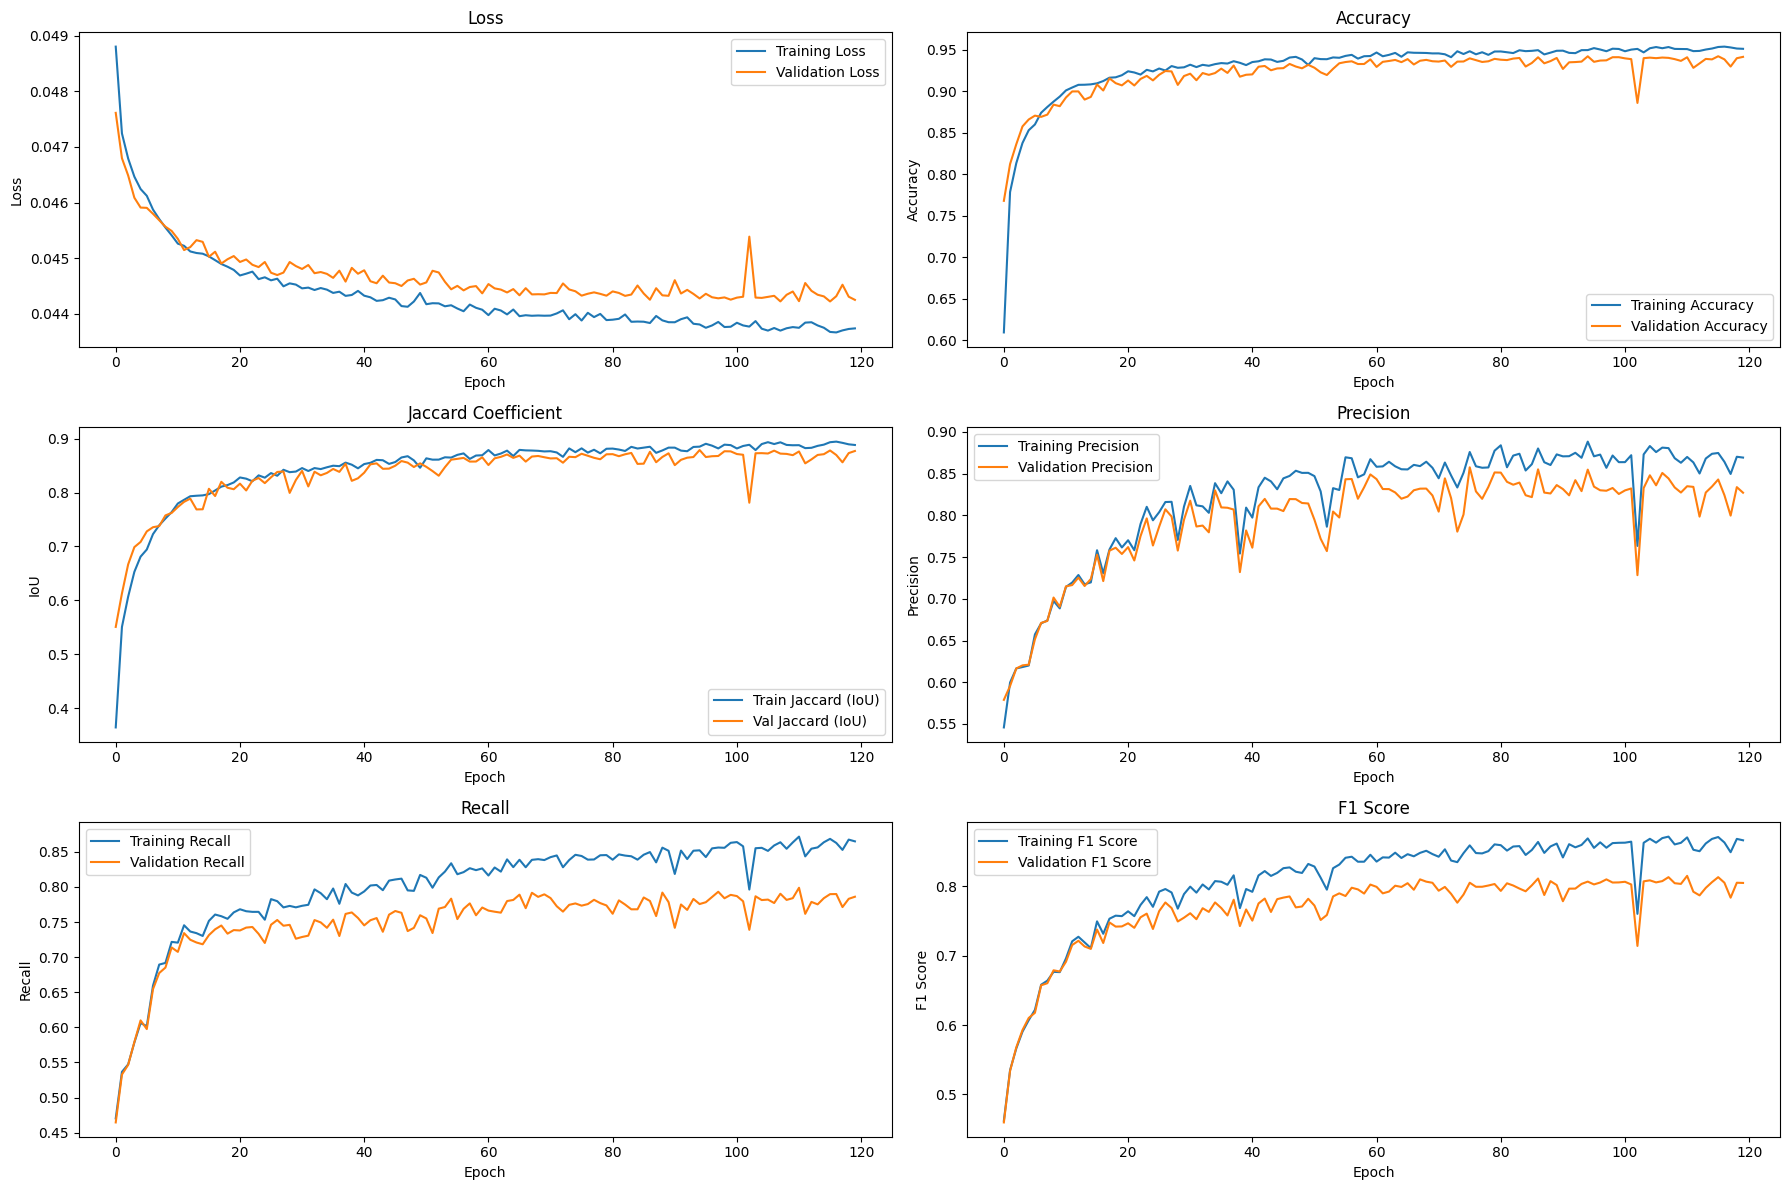

337/337 ━━━━━━━━━━━━━━━━━━━━ 225s 670ms/step - accuracy: 0.9503 - jaccard_coef: 0.8865 - loss: 0.0438 - val_accuracy: 0.9414 - val_jaccard_coef: 0.8771 - val_loss: 0.0443


In [80]:
# ... (Previous imports and code remain the same) ...

# Instantiate the callback with all required arguments
plot_metrics = PlotMetrics(X_train, y_train, X_test, y_test)

# Fit the model
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=120,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_metrics],
                          shuffle=False)

# ... (Rest of the code remains the same) ...

In [81]:
history_a=model_history
history_a.history

{'accuracy': [0.6096288561820984,
  0.7786809206008911,
  0.8134057521820068,
  0.8377041816711426,
  0.8530615568161011,
  0.8600048422813416,
  0.8741359710693359,
  0.8810785412788391,
  0.8875182271003723,
  0.8935926556587219,
  0.9010220170021057,
  0.9044867753982544,
  0.9077258110046387,
  0.907846212387085,
  0.9082884788513184,
  0.9095420837402344,
  0.9122861623764038,
  0.9163193702697754,
  0.9167823791503906,
  0.9193081855773926,
  0.9240327477455139,
  0.9226018190383911,
  0.9200868010520935,
  0.9257866740226746,
  0.9239048361778259,
  0.9273598790168762,
  0.924964189529419,
  0.9303203225135803,
  0.928255021572113,
  0.9288191795349121,
  0.9319615364074707,
  0.9290853142738342,
  0.9318060278892517,
  0.930677592754364,
  0.932643473148346,
  0.9339100122451782,
  0.9333575367927551,
  0.9361761808395386,
  0.9342374205589294,
  0.9314941763877869,
  0.9351598620414734,
  0.9360768795013428,
  0.9384550452232361,
  0.9381805062294006,
  0.9353325963020325,
  0

In [82]:
import matplotlib.pyplot as plt
from google.colab import files
from datetime import datetime

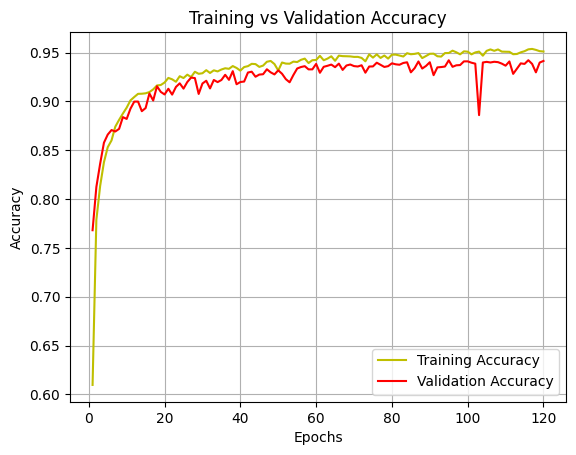

<Figure size 640x480 with 0 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
تم حفظ الملف في Google Drive: accuarcy_plot_20250622_074707.png


In [83]:
train_acc = history_a.history['accuracy']
val_acc = history_a.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'y', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
# حفظ الشكل في ملف مؤقت
filename = f"accuarcy_plot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# تحميل الملف إلى Google Drive (يجب تركيب Drive أولاً)
save_to_drive = True  # غير هذا إلى False إذا كنت تريد التنزيل فقط

if save_to_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    # انسخ الملف إلى مجلدك في Drive
    !cp "{filename}" "/content/drive/MyDrive/"
    print(f"تم حفظ الملف في Google Drive: {filename}")
else:
    # تنزيل الملف إلى الجهاز المحلي
    files.download(filename)

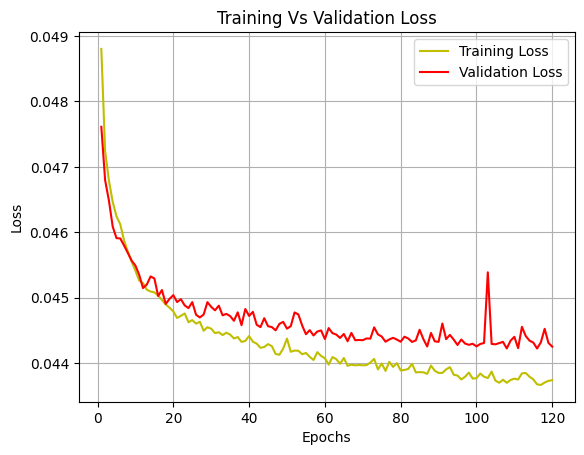

<Figure size 640x480 with 0 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
تم حفظ الملف في Google Drive: loss_plot_20250622_074709.png


In [84]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
# حفظ الشكل في ملف مؤقت
filename = f"loss_plot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# تحميل الملف إلى Google Drive (يجب تركيب Drive أولاً)
save_to_drive = True  # غير هذا إلى False إذا كنت تريد التنزيل فقط

if save_to_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    # انسخ الملف إلى مجلدك في Drive
    !cp "{filename}" "/content/drive/MyDrive/"
    print(f"تم حفظ الملف في Google Drive: {filename}")
else:
    # تنزيل الملف إلى الجهاز المحلي
    files.download(filename)

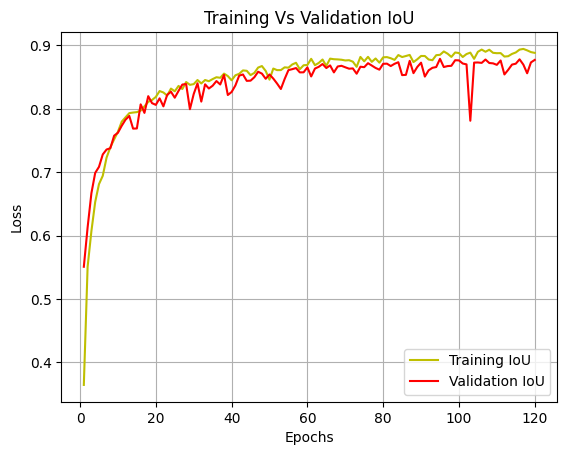

<Figure size 640x480 with 0 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
تم حفظ الملف في Google Drive: LOU_plot_20250622_074712.png


In [85]:
Jaccard_coef = history_a.history['jaccard_coef']
val_Jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(Jaccard_coef) + 1)
plt.plot(epochs, Jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_Jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
# حفظ الشكل في ملف مؤقت
filename = f"LOU_plot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# تحميل الملف إلى Google Drive (يجب تركيب Drive أولاً)
save_to_drive = True  # غير هذا إلى False إذا كنت تريد التنزيل فقط

if save_to_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    # انسخ الملف إلى مجلدك في Drive
    !cp "{filename}" "/content/drive/MyDrive/"
    print(f"تم حفظ الملف في Google Drive: {filename}")
else:
    # تنزيل الملف إلى الجهاز المحلي
    files.download(filename)

In [86]:
model_history.params


{'verbose': 1, 'epochs': 120, 'steps': 337}

In [87]:
y_pred = model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step


In [88]:
len(y_pred)

951

In [89]:
y_pred


array([[[[4.90006618e-03, 5.05608059e-02, 1.05196028e-04,
          9.32826459e-01, 1.15812905e-02, 2.61118475e-05],
         [6.49619498e-04, 2.59631835e-02, 4.46837430e-06,
          9.71903026e-01, 1.47869834e-03, 9.62315539e-07],
         [3.44331464e-04, 1.21684689e-02, 1.35288144e-06,
          9.86399770e-01, 1.08587753e-03, 2.11624211e-07],
         ...,
         [1.92303734e-03, 2.13704798e-02, 1.78323917e-05,
          9.74705040e-01, 1.98023231e-03, 3.37353572e-06],
         [4.35444759e-03, 2.41776425e-02, 4.54626424e-05,
          9.65894163e-01, 5.51902270e-03, 9.35006392e-06],
         [1.75000243e-02, 3.77225801e-02, 4.51214903e-04,
          9.18256283e-01, 2.58868448e-02, 1.83055396e-04]],

        [[8.09030840e-04, 2.10685823e-02, 4.70994883e-06,
          9.76175964e-01, 1.94033305e-03, 1.36875576e-06],
         [6.18375634e-05, 6.63237646e-03, 5.68126133e-08,
          9.93208587e-01, 9.71593399e-05, 1.18799388e-08],
         [2.42210317e-05, 2.75669037e-03, 1.4903

In [90]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [91]:
len(y_pred_argmax)

951

In [92]:
y_pred_argmax

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        ...,
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

In [93]:
y_test_argmax = np.argmax(y_test, axis=3)

In [94]:
y_test_argmax

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        ...,
        [3, 3, 3, ..., 3, 3, 2],
        [3, 3, 3, ..., 3, 2, 2],
        [3, 3, 3, ..., 3, 2, 2]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

# Comparing prediction results
### Using test images using mask images and predicted result images..


In [208]:
import random

In [209]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)


prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


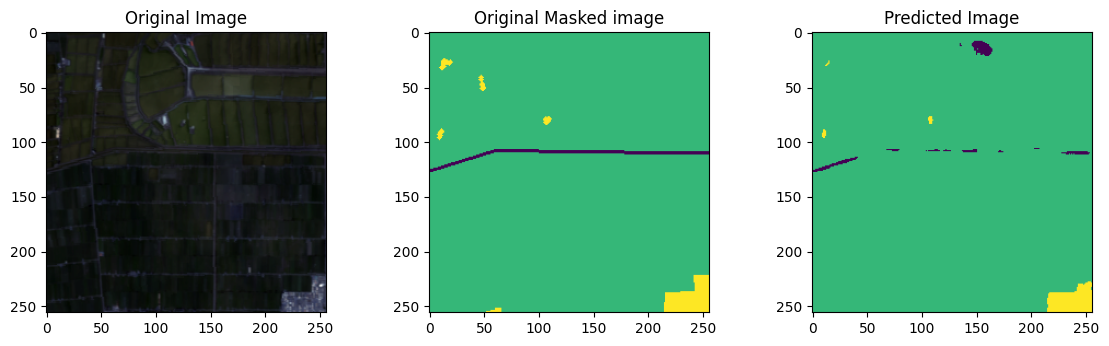

In [210]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [189]:
!ls -lah

total 68K
drwxr-xr-x 1 root root 4.0K Jun 22 07:47 .
drwxr-xr-x 1 root root 4.0K Jun 21 23:48 ..
-rw-r--r-- 1 root root  15K Jun 22 07:47 accuarcy_plot_20250622_074707.png
drwxr-xr-x 4 root root 4.0K Jun 18 13:27 .config
drwx------ 5 root root 4.0K Jun 22 00:09 drive
-rw-r--r-- 1 root root  15K Jun 22 07:47 loss_plot_20250622_074709.png
-rw-r--r-- 1 root root  15K Jun 22 07:47 LOU_plot_20250622_074712.png
drwxr-xr-x 1 root root 4.0K Jun 18 13:28 sample_data


In [236]:
# import keras.saving
# keras.saving.save_model(model, 'Final_my_model_120_.keras')

# model.save("Final_satellite_segmentation_120_Egypt_Data_set.h5")

In [190]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. الحصول على تنبؤات النموذج لبيانات التدريب
y_train_pred = model.predict(X_train)  # تنبؤات النموذج (one-hot encoded)
y_train_pred_argmax = np.argmax(y_train_pred, axis=3).flatten()  # تحويل إلى فئات
y_train_true_argmax = np.argmax(y_train, axis=3).flatten()  # التصنيفات الحقيقية

# 2. أسماء الفئات (يجب أن تتطابق مع الترتيب في labels)
class_names = ['Bare_ground', 'Water_Bodies', 'Road',
               'Agricultural_area', 'Built_area', 'Unlabeled']

# 3. حساب تقرير التصنيف الكامل
print("\n Train Detailed Classification Report:")
print(classification_report(
    y_train_true_argmax,
    y_train_pred_argmax,
    target_names=class_names,
    digits=4  # دقة الأرقام (4 خانات عشرية)
))

# 4. (اختياري) طباعة مصفوفة الارتباك للتدريب
cm_train = confusion_matrix(y_train_true_argmax, y_train_pred_argmax)
print("\n Confusion Matrix:")
print(cm_train)

In [213]:
# 1. الحصول على تنبؤات النموذج لبيانات الاختبار
y_test_pred = model.predict(X_test)  # تنبؤات النموذج (one-hot encoded)
y_test_pred_argmax = np.argmax(y_test_pred, axis=3).flatten()  # تحويل إلى فئات
y_test_true_argmax = np.argmax(y_test, axis=3).flatten()  # التصنيفات الحقيقية

# 2. أسماء الفئات (يجب أن تتطابق مع الترتيب في labels)
class_names = ['Bare_ground', 'Water_Bodies', 'Road',
               'Agricultural_area', 'Built_area', 'Unlabeled']

# 3. حساب تقرير التصنيف الكامل
print("\nTest Detailed Classification Report:")
print(classification_report(
    y_test_true_argmax,
    y_test_pred_argmax,
    target_names=class_names,
    digits=4  # دقة الأرقام (4 خانات عشرية)
))

# 4. (اختياري) طباعة مصفوفة الارتباك للتدريب
cm_test = confusion_matrix(y_test_true_argmax, y_test_pred_argmax)
print("\n Confusion Matrix:")
print(cm_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step

Test Detailed Classification Report:
                   precision    recall  f1-score   support

      Bare_ground     0.9464    0.9501    0.9483  13696791
     Water_Bodies     0.9514    0.9307    0.9409  12361944
             Road     0.6556    0.5528    0.5999    387923
Agricultural_area     0.9524    0.9718    0.9620  30641907
       Built_area     0.8665    0.8141    0.8395   4921545
        Unlabeled     0.5910    0.4965    0.5397    314626

         accuracy                         0.9414  62324736
        macro avg     0.8272    0.7860    0.8050  62324736
     weighted avg     0.9404    0.9414    0.9407  62324736


 Confusion Matrix:
[[13013760   119944    59935   293295   164892    44965]
 [  185250 11505382     5658   602887    28420    34347]
 [   69587     9100   214462    44811    38694    11269]
 [  105661   350630    12573 29776483   382080    14480]
 [  336866    22156    32807   520042  4006629     3045]
 [   39764    86502    

In [211]:
from sklearn.metrics import confusion_matrix
import numpy as np

# التنبؤ على بيانات التدريب
y_train_pred = model.predict(X_train)
y_train_pred_argmax = np.argmax(y_train_pred, axis=3).flatten()
y_train_true_argmax = np.argmax(y_train, axis=3).flatten()

# حساب confusion matrix
cm_train = confusion_matrix(y_train_true_argmax, y_train_pred_argmax)

# حساب دقة كل فئة
class_accuracy_train = cm_train.diagonal() / cm_train.sum(axis=1)

# أسماء الفئات
class_names = ['Bare_ground', 'Water_Bodies', 'Road',
              'Agricultural_area', 'Built_area', 'Unlabeled']

# طباعة دقة كل فئة لبيانات التدريب
print("\nTrain Class-wise  Accuracy:")
for i, name in enumerate(class_names):
    print(f"{name}: {class_accuracy_train[i]:.4f} (Correct: {cm_train[i,i]}/{cm_train.sum(axis=1)[i]})")

169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step

Train Class-wise  Accuracy:
Bare_ground: 0.9537 (Correct: 64714720/67855646)
Water_Bodies: 0.9545 (Correct: 76192889/79826940)
Road: 0.6503 (Correct: 1181673/1817132)
Agricultural_area: 0.9767 (Correct: 170289153/174352456)
Built_area: 0.8333 (Correct: 22802561/27364363)
Unlabeled: 0.8209 (Correct: 1391273/1694823)


In [212]:
# التنبؤ على بيانات الاختبار
y_test_pred = model.predict(X_test)
y_test_pred_argmax = np.argmax(y_test_pred, axis=3).flatten()
y_test_true_argmax = np.argmax(y_test, axis=3).flatten()

# حساب confusion matrix
cm_test = confusion_matrix(y_test_true_argmax, y_test_pred_argmax)

# حساب دقة كل فئة
class_accuracy_test = cm_test.diagonal() / cm_test.sum(axis=1)

# أسماء الفئات
class_names = ['Bare_ground', 'Water_Bodies', 'Road',
              'Agricultural_area', 'Built_area', 'Unlabeled']

# طباعة دقة كل فئة لبيانات التدريب
print("\nTest Class-wise  Accuracy:")
for i, name in enumerate(class_names):
    print(f"{name}: {class_accuracy_test[i]:.4f} (Correct: {cm_test[i,i]}/{cm_test.sum(axis=1)[i]})")

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step

Test Class-wise  Accuracy:
Bare_ground: 0.9501 (Correct: 13013760/13696791)
Water_Bodies: 0.9307 (Correct: 11505382/12361944)
Road: 0.5528 (Correct: 214462/387923)
Agricultural_area: 0.9718 (Correct: 29776483/30641907)
Built_area: 0.8141 (Correct: 4006629/4921545)
Unlabeled: 0.4965 (Correct: 156215/314626)


In [228]:
#  from keras.models import load_model

In [ ]:
# saved_model = load_model('/content/my_model_200_.keras',
#                          custom_objects={'dice_loss_plus_1focal_loss': total_loss,
#                                          'Jaccard_coef': Jaccard_coef})


In [230]:
# saved_model = load_model('/content/Final_satellite_segmentation_120_Egypt_Data_set.h5',
#                          custom_objects=({'dice_loss_plus_1focal_loss': total_loss,
#                                           'Jaccard_coef': Jaccard_coef}))

In [233]:
# model.loss.name


In [ ]:
# saved_model.get_config()

In [ ]:
# Performing Prediction using the custom image from Satallie Sentinel_2:

In [215]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.backend import flatten, sum as K_sum
import tensorflow as tf

# Custom Jaccard Coefficient (IoU) function
def Jaccard_coef(y_true, y_pred):
    y_true_flatten = flatten(y_true)
    y_pred_flatten = flatten(y_pred)
    intersection = K_sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (K_sum(y_true_flatten) + K_sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

# Function to compute validation metrics
def compute_validation_metrics(model, X_test, y_test, class_names):
    """
    Compute and print validation metrics: accuracy, IoU, loss, precision, recall, F1-score.

    Parameters:
    - model: Trained Keras model
    - X_test: Validation images (numpy array)
    - y_test: Validation ground truth labels (one-hot encoded, numpy array)
    - class_names: List of class names for classification report
    """
    print("\nComputing Validation Metrics...\n")

    # 1. Get model predictions
    y_pred = model.predict(X_test, verbose=1)  # One-hot encoded predictions
    y_pred_argmax = np.argmax(y_pred, axis=3).flatten()  # Convert to class labels
    y_test_argmax = np.argmax(y_test, axis=3).flatten()  # Ground truth class labels

    # 2. Compute loss and accuracy
    loss, jaccard, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # 3. Compute precision, recall, and F1-score
    precision = precision_score(y_test_argmax, y_pred_argmax, average='macro')
    recall = recall_score(y_test_argmax, y_pred_argmax, average='macro')
    f1 = f1_score(y_test_argmax, y_pred_argmax, average='macro')

    # 4. Print detailed classification report
    print("Test Detailed Classification Report:")
    print(classification_report(
        y_test_argmax,
        y_pred_argmax,
        target_names=class_names,
        digits=4
    ))

    # 5. Print summary of metrics
    print("\nValidation Metrics Summary:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"IoU (Jaccard Coefficient): {jaccard:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-Score (macro): {f1:.4f}")

# Define class names
class_names = ['Bare_ground', 'Water_Bodies', 'Road', 'Agricultural_area', 'Built_area', 'Unlabeled']

# Assuming model, X_test, and y_test are defined
# Call the function to compute metrics
compute_validation_metrics(model, X_test, y_test, class_names)


Computing Validation Metrics...

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
Test Detailed Classification Report:
                   precision    recall  f1-score   support

      Bare_ground     0.9464    0.9501    0.9483  13696791
     Water_Bodies     0.9514    0.9307    0.9409  12361944
             Road     0.6556    0.5528    0.5999    387923
Agricultural_area     0.9524    0.9718    0.9620  30641907
       Built_area     0.8665    0.8141    0.8395   4921545
        Unlabeled     0.5910    0.4965    0.5397    314626

         accuracy                         0.9414  62324736
        macro avg     0.8272    0.7860    0.8050  62324736
     weighted avg     0.9404    0.9414    0.9407  62324736


Validation Metrics Summary:
Loss: 0.0441
Accuracy: 0.9414
IoU (Jaccard Coefficient): 0.8764
Precision (macro): 0.8272
Recall (macro): 0.7860
F1-Score (macro): 0.8050
